In [12]:
import pandas as pd
import seaborn as sns

In [13]:
parts = pd.read_pickle('pkl/parts.pkl')

In [14]:
parts['BMI'] = parts['wt_kg']/((parts['ht_cm']/100)**2)
parts

,disease,diag_dis,dom_hand,sex,wt_kg,ht_cm,eth_part,rac_part,moth_smk,BMI
BARCODE2,,,,,,,,,,
AC000003,MS,CASE,LEFT,MALE,90.718474,180.34,Non Hispanic or Latino,White,False,27.894052
AC000005,MS,CASE,RIGHT,FEMALE,93.440028,167.64,Non Hispanic or Latino,White,False,33.248929
AC000006,CONTROL,CONTROL,RIGHT,FEMALE,102.058283,162.56,Non Hispanic or Latino,White,True,38.620765
AC000007,CONTROL,CONTROL,LEFT,MALE,79.832257,179.07,Non Hispanic or Latino,White,False,24.896181
AC000009,TM,CASE,RIGHT,FEMALE,58.967008,166.37,Non Hispanic or Latino,White,True,21.303897
...,...,...,...,...,...,...,...,...,...,...
PC001059,CONTROL,CONTROL,RIGHT,MALE,27.215542,132.08,Non Hispanic or Latino,White,False,15.600656
PC001064,CONTROL,CONTROL,RIGHT,FEMALE,58.967008,162.56,Non Hispanic or Latino,White,False,22.314220
PC001065,CONTROL,CONTROL,RIGHT,FEMALE,48.987976,165.10,Non Hispanic or Latino,White,False,17.971956


In [15]:
outlier = parts.BMI.idxmax()
parts.drop(outlier, inplace = True)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

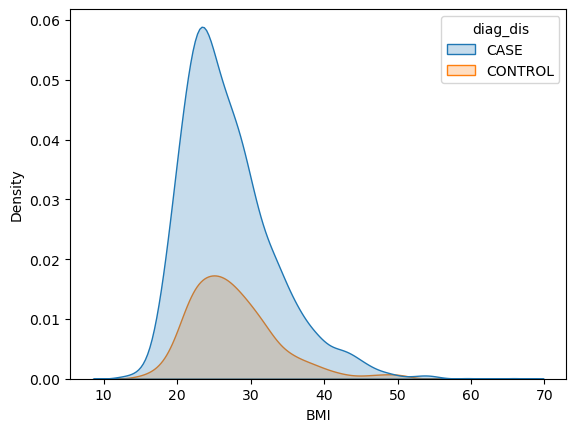

In [16]:
sns.kdeplot(data = parts, x = 'BMI', hue = 'diag_dis', shade = True)

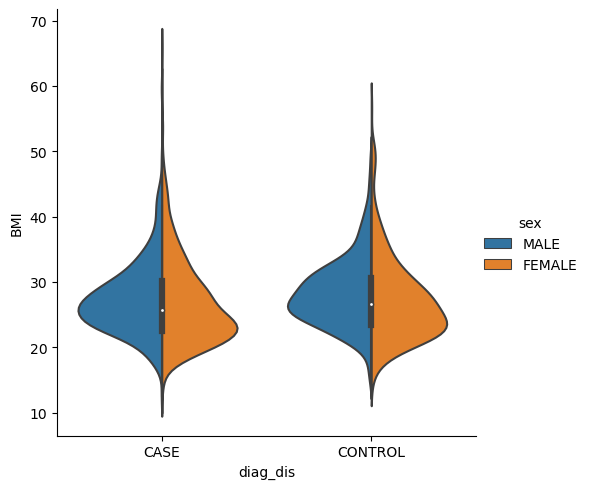

In [17]:
sns.catplot(data=parts, kind='violin', x='diag_dis', y = 'BMI', hue = 'sex', split = True)

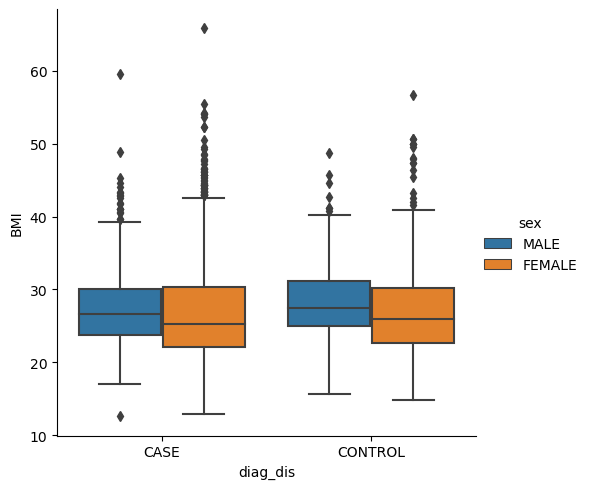

In [18]:
sns.catplot(data=parts, kind='box', x='diag_dis', y = 'BMI', hue = 'sex')

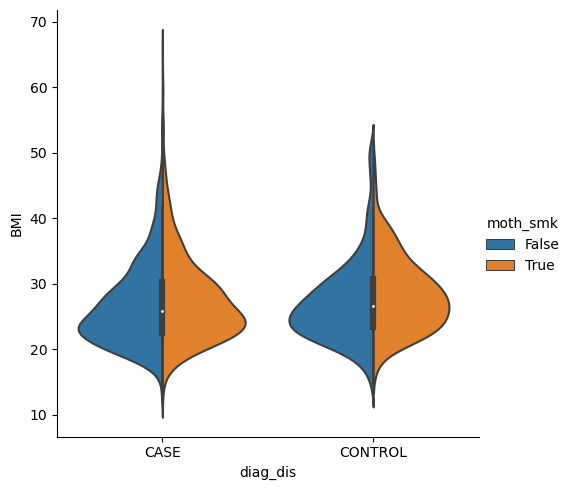

In [19]:
sns.catplot(data=parts, kind='violin', x='diag_dis', y = 'BMI', hue = 'moth_smk', split = True)

In [20]:
parts.diag_dis.value_counts()

CASE       2301
CONTROL     688
Name: diag_dis, dtype: int64

In [21]:
moth_smk_by_diag = parts.moth_smk.groupby(parts['diag_dis']).value_counts()
moth_smk_by_diag

diag_dis  moth_smk
CASE      False       1474
          True         541
CONTROL   False        433
          True         172
Name: moth_smk, dtype: int64

<AxesSubplot:xlabel='diag_dis'>

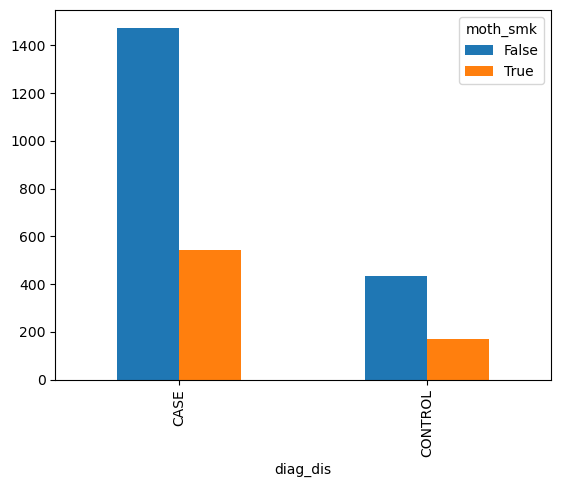

In [22]:
moth_smk_by_diag.unstack().plot(kind='bar')

#### Citation for data.unstack().plot(kind='bar'): https://stackoverflow.com/questions/34248741/plotting-pandas-multiindex-bar-chart